In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
sales = pd.read_csv('nw6_data_sale.csv', index_col=0)
sales = sales.drop(['attributes', 'postcode'], axis = 1)

# The current renting data is segmented by beds until 3 and then is 4 or more. 
# We need to adjust the selling data for that
sales.loc[sales['beds']>=4,'beds'] = 4

In [53]:
rents = pd.read_csv('nw6_data_rent_prev_years_prediction.csv', index_col=0).rename(columns={'price': 'rent'})


#sell_data = sell_data.groupby(['beds','year'])['price'].mean().reset_index()

full_data =  sales.merge(rents, on=['beds', 'year', 'year'])

full_data['yield'] = full_data['rent']*12/full_data['price']

full_data_s = full_data.drop(['address', 'date_x', 'date_y', 'baths', 'reception', 'href', 'type'],1)

In [59]:
full_data_s = full_data_s[(full_data_s['yield']*100>1)&(full_data_s['yield']*100<7)]

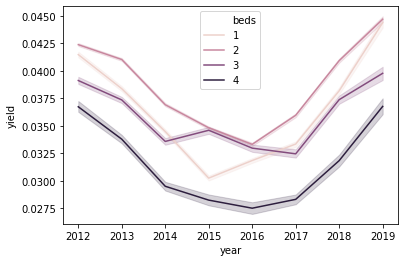

In [60]:
sns.lineplot(y='yield', x='year', data=full_data_s, hue='beds')

In [61]:
full_data_s.sort_values('yield')

,beds,price,year,real_price,real_year,rent,yield
310701,4,4900000,2017,5000,2019,4083.934227,0.010001
276175,1,1295000,2015,1668,2019,1079.451434,0.010003
267088,4,3450000,2013,4000,2019,2877.353194,0.010008
267077,4,3450000,2013,4000,2019,2877.353194,0.010008
267063,4,3450000,2013,4000,2019,2877.353194,0.010008
...,...,...,...,...,...,...,...
101318,2,382500,2013,3142,2019,2231.019549,0.069993
101343,2,382500,2013,3142,2019,2231.019549,0.069993
162834,2,598000,2019,3488,2019,3488.000000,0.069993
258931,2,313582,2014,2579,2019,1829.114478,0.069996


In [35]:
#Outlier

In [63]:
sales.groupby(['beds', 'year'])['price'].agg(['mean', 'std','size'])

mean            std  size
beds year                                   
0    1995  1.204167e+05   81605.887247     3
     1996  7.035000e+04   37585.569039     5
     1997  5.217500e+04    9215.340471     4
     1998  1.592650e+05  150855.261850    10
     1999  1.701250e+05  132972.663231     4
...                 ...            ...   ...
4    2015  1.743564e+06  888100.360483    87
     2016  1.800684e+06  761083.639307    54
     2017  1.822335e+06  787636.098461    63
     2018  1.753154e+06  849697.837578    76
     2019  1.611404e+06  633884.410728    37

[125 rows x 3 columns]